# Jeyhun Yagublu

In [95]:
import pandas as pd
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics as skmet
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
from scipy.stats.stats import pearsonr
import itertools
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
pd.set_option('display.expand_frame_repr', False)
%matplotlib inline

In [96]:
data=[['coffee', 'milk', 'sugar', 'eggs', 'bread'],#1
['bread', 'coffee', 'butter', 'milk', 'eggs'],#2
['sugar', 'cheese', 'cream', 'ham', 'salt'],#3
['eggs', 'cheese', 'apples', 'bread', 'butter'],#4
['apples', 'bread', 'eggs', 'butter', 'tea'],#5
['cheese', 'bread', 'coffee', 'milk', 'tea'],#6
['apples', 'salt', 'butter', 'ham', 'coffee'],#7
['salt', 'butter', 'bread', 'ham', 'apples']] #8 

In [97]:
uniques = np.unique(data)
X = np.searchsorted(uniques, data)

In [98]:
def Jaccard_dist ( l1 ,  l2 ) :
    l1=set(l1) 
    l2=set(l2)
    dist=1-len(l1.intersection(l2))/len(l1.union(l2))
    return dist
    

In [99]:
mat=skmet.pairwise_distances(X,  metric=Jaccard_dist )
mat.round(4)


array([[0.    , 0.3333, 0.8889, 0.75  , 0.75  , 0.5714, 0.8889, 0.8889],
       [0.3333, 0.    , 1.    , 0.5714, 0.5714, 0.5714, 0.75  , 0.75  ],
       [0.8889, 1.    , 0.    , 0.8889, 1.    , 0.8889, 0.75  , 0.75  ],
       [0.75  , 0.5714, 0.8889, 0.    , 0.3333, 0.75  , 0.75  , 0.5714],
       [0.75  , 0.5714, 1.    , 0.3333, 0.    , 0.75  , 0.75  , 0.5714],
       [0.5714, 0.5714, 0.8889, 0.75  , 0.75  , 0.    , 0.8889, 0.8889],
       [0.8889, 0.75  , 0.75  , 0.75  , 0.75  , 0.8889, 0.    , 0.3333],
       [0.8889, 0.75  , 0.75  , 0.5714, 0.5714, 0.8889, 0.3333, 0.    ]])

for i in range(1,9):
    print("T"+str(i)+"&",end="")
    
for i in range (0,8):
    print("T"+str(i+1)+"&",end="")
    for j in range(0,8):
         print(str(mat.round(4)[i][j])+"&",end="")
    print("\\")        

In [100]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

[0 0 1 0 0 0 1 1]


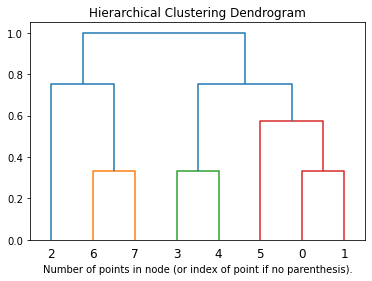

In [101]:
model = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage='complete',compute_distances=True)
model=model.fit(mat)
labels = model.labels_
print(labels)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [108]:
data=[['coffee', 'milk', 'sugar', 'eggs', 'bread'],#1
['bread', 'coffee', 'butter', 'milk', 'eggs'],#2
['sugar', 'cheese', 'cream', 'ham', 'salt'],#3
['eggs', 'cheese', 'apples', 'bread', 'butter'],#4
['apples', 'bread', 'eggs', 'butter', 'tea'],#5
['cheese', 'bread', 'coffee', 'milk', 'tea'],#6
['apples', 'salt', 'butter', 'ham', 'coffee'],#7
['salt', 'butter', 'bread', 'ham', 'apples']] #8 
uniques = np.unique(data)
X = np.searchsorted(uniques, data)
print(X)
def Jaccard_dist ( l1 ,  l2 ) :
    l1=set(l1) 
    l2=set(l2)
    dist=1-len(l1.intersection(l2))/len(l1.union(l2))
    return dist
    
mat=skmet.pairwise_distances(X,  metric=Jaccard_dist )
mat

model = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage='complete')
model.fit(mat)
labels = model.labels_
labels

[[ 4  8 10  6  1]
 [ 1  4  2  8  6]
 [10  3  5  7  9]
 [ 6  3  0  1  2]
 [ 0  1  6  2 11]
 [ 3  1  4  8 11]
 [ 0  9  2  7  4]
 [ 9  2  1  7  0]]


array([0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)


[['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['apples' 'salt' 'butter' 'ham' 'coffee']
 ['salt' 'butter' 'bread' 'ham' 'apples']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']]


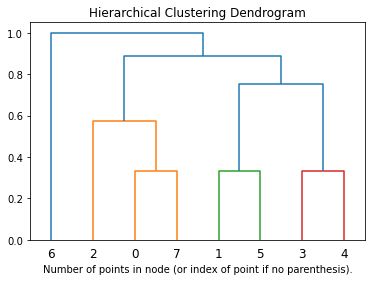

[0 0 0 0 0 0 1 0]



In [128]:
data=[['bread', 'coffee', 'butter', 'milk', 'eggs'],#T2
['apples', 'bread', 'eggs', 'butter', 'tea'],#T5
['cheese', 'bread', 'coffee', 'milk', 'tea'],#T6
['apples', 'salt', 'butter', 'ham', 'coffee'],#T7
['salt', 'butter', 'bread', 'ham', 'apples'], #T8
['eggs', 'cheese', 'apples', 'bread', 'butter'],#T4
['sugar', 'cheese', 'cream', 'ham', 'salt'],#T3
['coffee', 'milk', 'sugar', 'eggs', 'bread']]#T1

uniques = np.unique(data)
X = np.searchsorted(uniques, data)
mat=skmet.pairwise_distances(X,  metric=Jaccard_dist )
model = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage='complete',compute_distances=True)
model.fit(mat)
labels = model.labels_
labels
print()
print(np.matrix(data))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
print(labels)
print()



# C

[0 0 1 0 0 0 0 0]


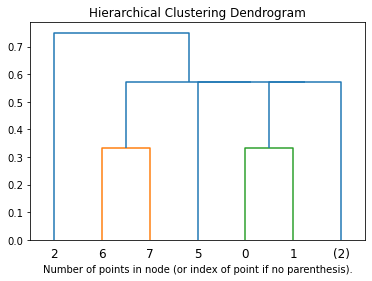

In [131]:
data=[['coffee', 'milk', 'sugar', 'eggs', 'bread'],#1
['bread', 'coffee', 'butter', 'milk', 'eggs'],#2
['sugar', 'cheese', 'cream', 'ham', 'salt'],#3
['eggs', 'cheese', 'apples', 'bread', 'butter'],#4
['apples', 'bread', 'eggs', 'butter', 'tea'],#5
['cheese', 'bread', 'coffee', 'milk', 'tea'],#6
['apples', 'salt', 'butter', 'ham', 'coffee'],#7
['salt', 'butter', 'bread', 'ham', 'apples']] #8 
uniques = np.unique(data)
X = np.searchsorted(uniques, data)

def Jaccard_dist ( l1 ,  l2 ) :
    l1=set(l1) 
    l2=set(l2)
    dist=1-len(l1.intersection(l2))/len(l1.union(l2))
    return dist
    
mat=skmet.pairwise_distances(X,  metric=Jaccard_dist )

model = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage='single',compute_distances=True)
model.fit(mat)
labels = model.labels_
labels
print(labels)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


[['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['apples' 'salt' 'butter' 'ham' 'coffee']
 ['salt' 'butter' 'bread' 'ham' 'apples']]
[0 0 1 0 0 0 0 0]


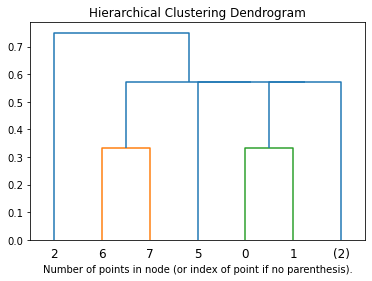



[['apples' 'salt' 'butter' 'ham' 'coffee']
 ['salt' 'butter' 'bread' 'ham' 'apples']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']]
[0 0 0 1 0 0 0 0]


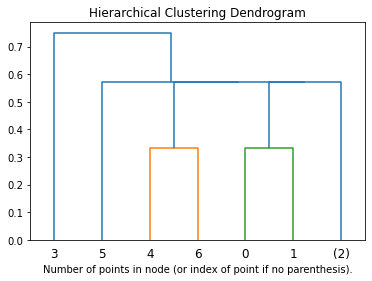



[['salt' 'butter' 'bread' 'ham' 'apples']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['apples' 'salt' 'butter' 'ham' 'coffee']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']]
[0 0 1 0 0 0 0 0]


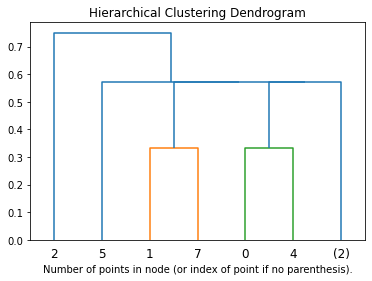



[['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['apples' 'salt' 'butter' 'ham' 'coffee']
 ['salt' 'butter' 'bread' 'ham' 'apples']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']]
[0 0 1 0 0 0 0 0]


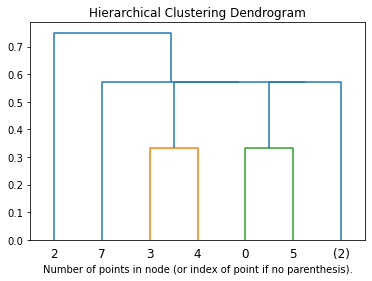



[['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['apples' 'salt' 'butter' 'ham' 'coffee']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['salt' 'butter' 'bread' 'ham' 'apples']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']]
[0 0 0 0 0 0 0 1]


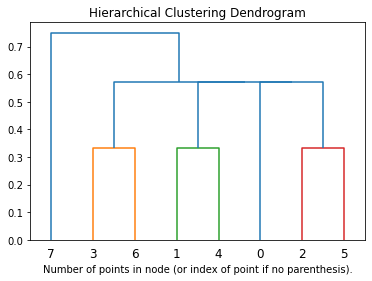



[['apples' 'bread' 'eggs' 'butter' 'tea']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['apples' 'salt' 'butter' 'ham' 'coffee']
 ['salt' 'butter' 'bread' 'ham' 'apples']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']]
[0 1 0 0 0 0 0 0]


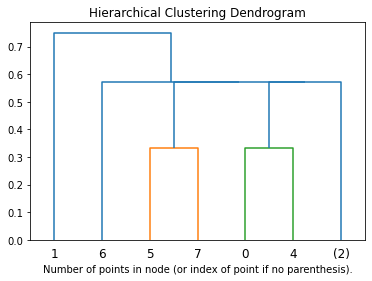



[['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['apples' 'salt' 'butter' 'ham' 'coffee']
 ['salt' 'butter' 'bread' 'ham' 'apples']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']]
[1 0 0 0 0 0 0 0]


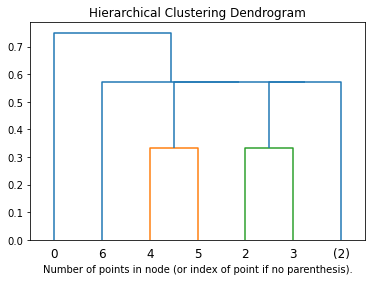



[['apples' 'salt' 'butter' 'ham' 'coffee']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['salt' 'butter' 'bread' 'ham' 'apples']]
[0 0 0 0 0 0 1 0]


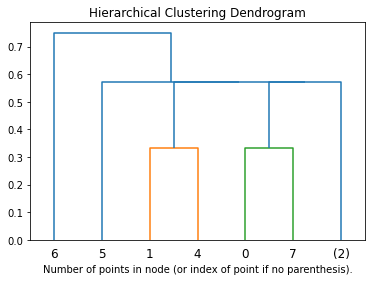



[['apples' 'bread' 'eggs' 'butter' 'tea']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['salt' 'butter' 'bread' 'ham' 'apples']
 ['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['apples' 'salt' 'butter' 'ham' 'coffee']]
[0 0 0 0 1 0 0 0]


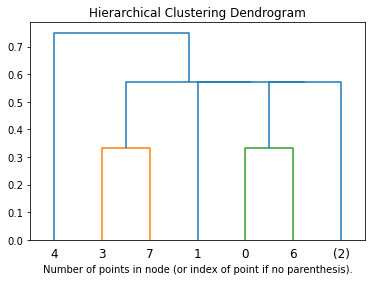



[['sugar' 'cheese' 'cream' 'ham' 'salt']
 ['cheese' 'bread' 'coffee' 'milk' 'tea']
 ['eggs' 'cheese' 'apples' 'bread' 'butter']
 ['bread' 'coffee' 'butter' 'milk' 'eggs']
 ['coffee' 'milk' 'sugar' 'eggs' 'bread']
 ['apples' 'bread' 'eggs' 'butter' 'tea']
 ['salt' 'butter' 'bread' 'ham' 'apples']
 ['apples' 'salt' 'butter' 'ham' 'coffee']]
[1 0 0 0 0 0 0 0]


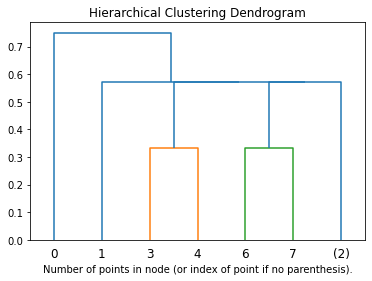

In [133]:
data=[['coffee', 'milk', 'sugar', 'eggs', 'bread'],#1
['bread', 'coffee', 'butter', 'milk', 'eggs'],#2
['sugar', 'cheese', 'cream', 'ham', 'salt'],#3
['eggs', 'cheese', 'apples', 'bread', 'butter'],#4
['apples', 'bread', 'eggs', 'butter', 'tea'],#5
['cheese', 'bread', 'coffee', 'milk', 'tea'],#6
['apples', 'salt', 'butter', 'ham', 'coffee'],#7
['salt', 'butter', 'bread', 'ham', 'apples']] #8 


for i in range (0,10):
    uniques = np.unique(data)
    X = np.searchsorted(uniques, data)
    mat=skmet.pairwise_distances(X,  metric=Jaccard_dist )
    model = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage='single',compute_distances=True)
    model.fit(mat)
    labels = model.labels_
    labels
    print()
    
    print(np.matrix(data))
    plt.title('Hierarchical Clustering Dendrogram')
    print(labels)
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

    print()
    np.random.shuffle(data)
